# Load the dataset

In [ ]:
import pandas as pd
import glob

# Path to the datasets (if running on Kaggle, all files are in the input directory)
data_path = "/kaggle/input/twitter-dataset/"

# Load fake account CSV files and add label = 1 (Fake)
fake_files = glob.glob(data_path + "fake *.csv")
fake_dfs = [pd.read_csv(file) for file in fake_files]

# Rename 'user_name' to 'username' and add label
for df in fake_dfs:
    df.rename(columns={"user_name": "username"}, inplace=True)
    df["label"] = 1

# Load genuine account CSV and add label = 0 (Genuine)
genuine_df = pd.read_csv(data_path + "genuine account.csv")
genuine_df.rename(columns={"name": "username"}, inplace=True)
genuine_df["label"] = 0

# Merge all data (without saving)
merged_df = pd.concat(fake_dfs + [genuine_df], ignore_index=True)

In [62]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          12187 non-null  object 
 1   id                                  12184 non-null  object 
 2   username                            12184 non-null  object 
 3   screen_name                         12184 non-null  object 
 4   statuses_count                      12179 non-null  float64
 5   followers_count                     12179 non-null  float64
 6   friends_count                       12179 non-null  float64
 7   favourites_count                    12179 non-null  float64
 8   listed_count                        12179 non-null  float64
 9   url                                 7093 non-null   object 
 10  lang                                12179 non-null  object 
 11  time_zone                           6930 

In [63]:
from IPython.display import display
import pandas as pd

# Enable scrollable display
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 1000) 

# Display DataFrame
display(merged_df.head())

,Unnamed: 0,id,username,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,label
0,0,7248952,Bhuvan Chand,tarunkjuyal,1564.0,709.0,1837.0,8262.0,7.0,http://t.co/q2lx24LjWE,en,Hawaii,Berekely,False,False,False,http://pbs.twimg.com/profile_images/53905961/s...,True,https://abs.twimg.com/images/themes/theme4/bg.gif,3C3940,https://pbs.twimg.com/profile_images/53905961/...,5ED4DC,False,DEB2B3,http://abs.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,-36000.0,False,False,False,False,False,Love Your Life,False,False,7/4/2007 12:30,1
1,1,7732472,Daniel Wagner,DanielWagner,1245.0,3418.0,45.0,13.0,53.0,http://t.co/ovIzskKpgX,en,London,United Kingdom,False,False,True,http://pbs.twimg.com/profile_images/7658845866...,True,https://pbs.twimg.com/profile_background_image...,333333,https://pbs.twimg.com/profile_images/765884586...,FFFFFF,False,F3F3F3,http://pbs.twimg.com/profile_background_images...,EBEBEB,FAB81E,3600.0,False,False,False,False,False,My purpose is to awaken people to life changin...,False,False,7/26/2007 9:07,1
2,2,9524952,Andrew Lock,Andrewlock,5242.0,63333.0,8695.0,72.0,1069.0,https://t.co/BXkK5yxgTE,en,Mountain Time (US & Canada),"Los Angeles, CA",False,False,True,http://pbs.twimg.com/profile_images/6121416899...,False,https://abs.twimg.com/images/themes/theme1/bg.png,0,https://pbs.twimg.com/profile_images/612141689...,0273B9,False,FFB532,http://abs.twimg.com/images/themes/theme1/bg.png,FFFFFF,0000FF,-21600.0,False,False,False,False,False,I present the #1 rated Help My Business! WebTV...,False,False,10/18/2007 16:36,1
3,3,14596967,fxgenie,fxgenie,3788.0,2102.0,2409.0,0.0,2.0,http://t.co/WMvjPC1htW,en,Eastern Time (US & Canada),usa,False,False,False,http://pbs.twimg.com/profile_images/53530606/s...,True,https://pbs.twimg.com/profile_background_image...,C7C3C7,https://pbs.twimg.com/profile_images/53530606/...,5FF209,False,03000D,http://pbs.twimg.com/profile_background_images...,FC0047,2FC2EF,-14400.0,False,False,False,False,False,forex trader,False,False,4/30/2008 6:22,1
4,4,14826060,"Ron Smalley, MD ret",ABetterBiz,2597.0,2698.0,3265.0,0.0,21.0,http://t.co/3OZnEGbiBK,en,Mountain Time (US & Canada),Colorado - USA,False,False,True,http://pbs.twimg.com/profile_images/3528055178...,True,https://pbs.twimg.com/profile_background_image...,4D3339,https://pbs.twimg.com/profile_images/352805517...,A38A5F,True,D1C5A5,http://pbs.twimg.com/profile_background_images...,793A57,8C873E,-21600.0,False,False,False,False,False,Got wonderful items you would like to sell onl...,False,False,5/18/2008 23:56,1


## Checking Null Values in dataset

In [64]:
import pandas as pd
null_counts = merged_df.isnull().sum()
pd.set_option("display.max_rows", None)
print("Missing Values in Each Column:\n")
print(null_counts[null_counts > 0].sort_values(ascending=False))

Missing Values in Each Column:

utc_offset                            5259
time_zone                             5259
url                                   5096
location                              5044
description                           1587
created_at                              15
following                               15
contributors_enabled                    15
profile_background_tile                 10
profile_sidebar_fill_color              10
profile_background_image_url            10
profile_background_color                10
profile_link_color                      10
is_translator                           10
profile_image_url_https                 10
follow_request_sent                     10
protected                               10
verified                                10
notifications                           10
profile_sidebar_border_color            10
profile_background_image_url_https      10
profile_text_color                      10
profile_use_background

In [65]:
import pandas as pd

# Create a dictionary to store missing value counts per label
missing_data = []

for col in merged_df.columns:
    missing_rows = merged_df[merged_df[col].isnull()]
    if not missing_rows.empty:
        label_counts = missing_rows["label"].value_counts()
        missing_data.append([
            col,
            label_counts.get(0, 0),  # Missing values in label 0
            label_counts.get(1, 0)   # Missing values in label 1
        ])

# Convert to DataFrame for a better table format
missing_df = pd.DataFrame(missing_data, columns=["Column", "Missing in 0", "Missing in 1"])

# Display the table
print(missing_df)

                                Column  Missing in 0  Missing in 1
0                           Unnamed: 0             2             0
1                                   id             5             0
2                             username             5             0
3                          screen_name             5             0
4                       statuses_count            10             0
5                      followers_count            10             0
6                        friends_count            10             0
7                     favourites_count            10             0
8                         listed_count            10             0
9                                  url          3193          1903
10                                lang            10             0
11                           time_zone          1168          4091
12                            location          1340          3704
13                     default_profile            10          

## Feature Selection

In [66]:
import pandas as pd

# Select only the required columns
selected_columns = [
    "statuses_count", "followers_count", "friends_count", 
    "favourites_count", "listed_count", "geo_enabled", "description", "label"
]

# Keep only these columns
merged_df = merged_df[selected_columns]

# Set display options to prevent truncation
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Prevent wrapping
pd.set_option("display.max_rows", 50)  # Increase row limit

# Display the first few rows
display(merged_df.head(10))

,statuses_count,followers_count,friends_count,favourites_count,listed_count,geo_enabled,description,label
0,1564.0,709.0,1837.0,8262.0,7.0,False,Love Your Life,1
1,1245.0,3418.0,45.0,13.0,53.0,True,My purpose is to awaken people to life changin...,1
2,5242.0,63333.0,8695.0,72.0,1069.0,True,I present the #1 rated Help My Business! WebTV...,1
3,3788.0,2102.0,2409.0,0.0,2.0,False,forex trader,1
4,2597.0,2698.0,3265.0,0.0,21.0,True,Got wonderful items you would like to sell onl...,1
5,368.0,1136.0,1689.0,1.0,12.0,True,"internet, travel, photography",1
6,857.0,4007.0,1837.0,1.0,3.0,False,"my name is eddie-i enjoy videos, internet, so...",1
7,25.0,730.0,1536.0,0.0,4.0,False,"Positive thinking specialist ! SEO, Marketing,...",1
8,9.0,1140.0,1670.0,0.0,3.0,False,"Online entrepreneur, loving husband,proud fath...",1
9,66.0,769.0,1098.0,0.0,4.0,False,Online Social Shopping network of India. Help ...,1


## Removing Null values in feature selected columns

In [67]:
# Drop rows with missing values in selected columns
merged_df = merged_df.dropna()

# Reset index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

# Display updated dataset info
print("Remaining Rows After Dropping Nulls:", len(merged_df))
print(merged_df.isnull().sum())  # Verify no missing values
display(merged_df.head())  # Show first few rows

Remaining Rows After Dropping Nulls: 10602
statuses_count      0
followers_count     0
friends_count       0
favourites_count    0
listed_count        0
geo_enabled         0
description         0
label               0
dtype: int64


,statuses_count,followers_count,friends_count,favourites_count,listed_count,geo_enabled,description,label
0,1564.0,709.0,1837.0,8262.0,7.0,False,Love Your Life,1
1,1245.0,3418.0,45.0,13.0,53.0,True,My purpose is to awaken people to life changin...,1
2,5242.0,63333.0,8695.0,72.0,1069.0,True,I present the #1 rated Help My Business! WebTV...,1
3,3788.0,2102.0,2409.0,0.0,2.0,False,forex trader,1
4,2597.0,2698.0,3265.0,0.0,21.0,True,Got wonderful items you would like to sell onl...,1


Count of Each Label:
label
1    6120
0    4482
Name: count, dtype: int64


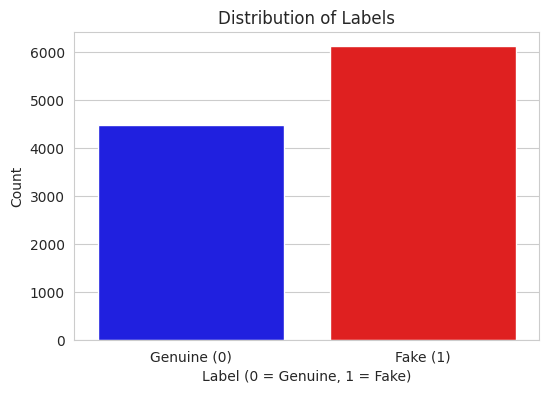

In [68]:
# Count occurrences of each label (0 = genuine, 1 = fake)
label_counts = merged_df["label"].value_counts()

# Print the counts
print("Count of Each Label:")
print(label_counts)

# Optional: Visualize as a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=["blue", "red"])
plt.xlabel("Label (0 = Genuine, 1 = Fake)")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(ticks=[0, 1], labels=["Genuine (0)", "Fake (1)"])
plt.show()

In [69]:
# Check data types of each column
print(merged_df.dtypes)

# Check how many categorical columns exist
categorical_cols = merged_df.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:", categorical_cols)

statuses_count      float64
followers_count     float64
friends_count       float64
favourites_count    float64
listed_count        float64
geo_enabled          object
description          object
label                 int64
dtype: object

Categorical Columns: Index(['geo_enabled', 'description'], dtype='object')


In [70]:
display(merged_df.sample(10))  # Show 10 random samples

,statuses_count,followers_count,friends_count,favourites_count,listed_count,geo_enabled,description,label
9539,20618.0,429.0,481.0,5904.0,65.0,True,"Crazy boy from Florence, Italy! Linux lover, c...",0
2124,2234.0,15733.0,17814.0,148.0,23.0,False,"Più un uomo sa, più è capace di perdonare",1
2330,3391.0,12969.0,10046.0,378.0,29.0,False,"prendersi gioco degli altri, non è un gioco.",1
1216,14.0,263.0,254.0,0.0,1.0,True,Follow this account for geo-targeted Internshi...,1
487,225.0,402.0,253.0,0.0,114.0,True,Follow this account for geo-targeted Business/...,1
7730,103019.0,604.0,862.0,2534.0,43.0,True,A Lady. Classy. Sassy. Sexy. Mom. Nurse. Foodi...,0
7127,80.0,19.0,117.0,21.0,0.0,True,"Amo el manga/anime,los videojuegos,el metal,yu...",0
4438,113.0,143.0,971.0,11.0,2.0,False,"Someone who loves music, movies and tv #Oncer ...",1
8855,8523.0,1890.0,2233.0,4593.0,15.0,True,Cali🌞🏝🏄‍♀️⛱🌊🌈🚴‍♀️🐠🐳🐬🦋#married #mother #humanit...,0
8199,36297.0,1186.0,389.0,4744.0,4.0,True,she was my best friend before anything else — ...,0


In [71]:
# Check unique values in categorical columns
print("Unique values in geo_enabled:\n", merged_df["geo_enabled"].value_counts())
print("\nUnique values in description (first 10):\n", merged_df["description"].dropna().unique()[:10])

Unique values in geo_enabled:
 geo_enabled
False    6411
True     4191
Name: count, dtype: int64

Unique values in description (first 10):
 ['Love Your Life'
 'My purpose is to awaken people to life changing knowledge for personal freedom'
 "I present the #1 rated Help My Business! WebTV Show (it's like The Daily Show for entrepreneurs at #helpmybusiness. Discover some nifty marketing tips."
 'forex trader'
 'Got wonderful items you would like to sell online?\r\nTry TRIPLE CLICKS for a great answer to the problem. \r\nEnjoy The Ride!'
 'internet, travel, photography'
 'my name is eddie-i  enjoy videos, internet, social networking and entertainment'
 'Positive thinking specialist ! SEO, Marketing, Business'
 'Online entrepreneur, loving husband,proud father, gaming addict'
 'Online Social Shopping network of India. Help others make better shopping decisions. What are you shopping?']


# visualizations on dataset

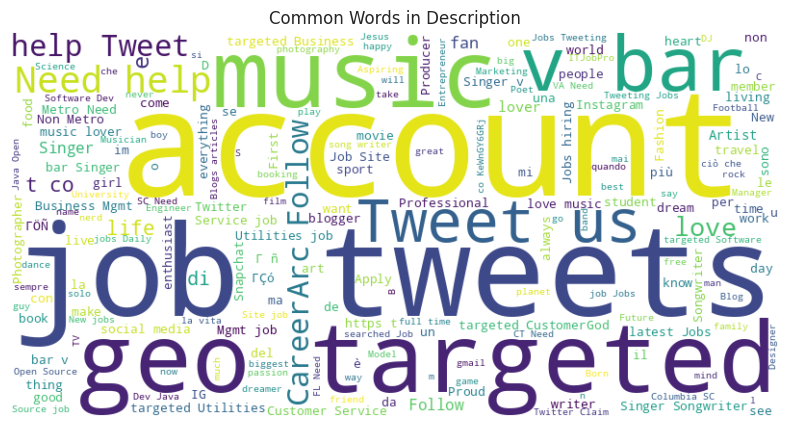

In [72]:
from wordcloud import WordCloud

# Combine all descriptions
text = " ".join(merged_df["description"].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Description")
plt.show()

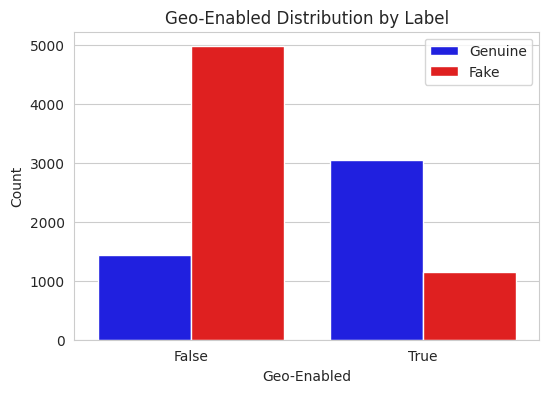

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x="geo_enabled", hue="label", data=merged_df, palette=["blue", "red"])
plt.xlabel("Geo-Enabled")
plt.ylabel("Count")
plt.title("Geo-Enabled Distribution by Label")
plt.legend(["Genuine", "Fake"])
plt.show()

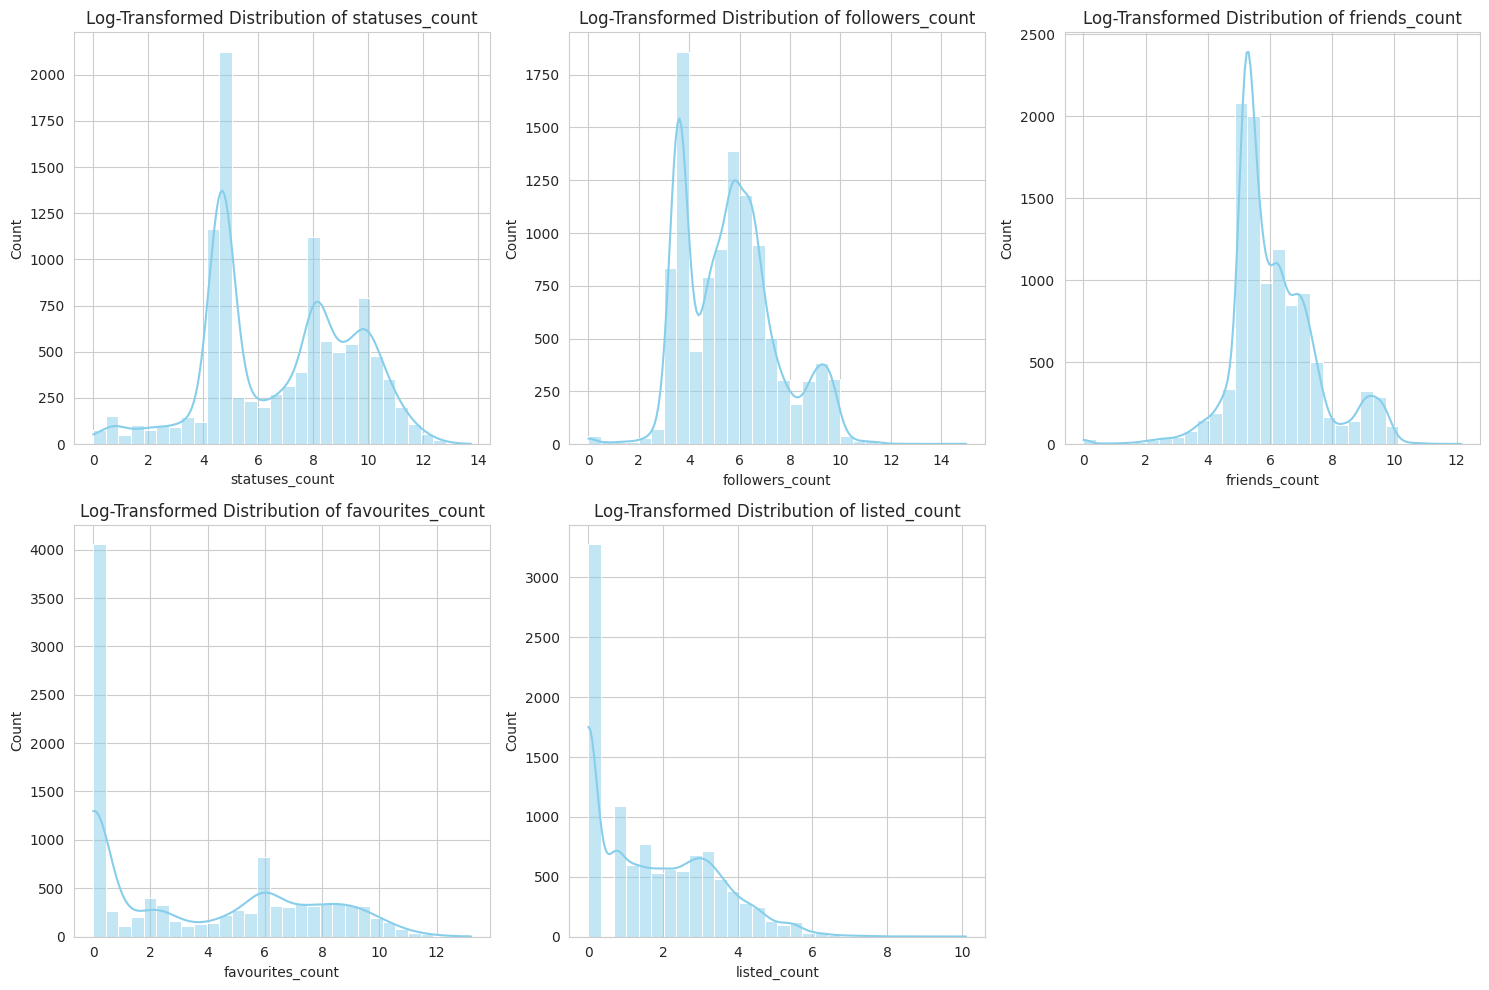

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_cols = ["statuses_count", "followers_count", "friends_count", 
                  "favourites_count", "listed_count"]

# Log transformation (adding 1 to avoid log(0))
log_df = merged_df.copy()
for col in numerical_cols:
    log_df[col] = np.log1p(log_df[col])

# Plot log-transformed distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(log_df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Log-Transformed Distribution of {col}")

plt.tight_layout()
plt.show()

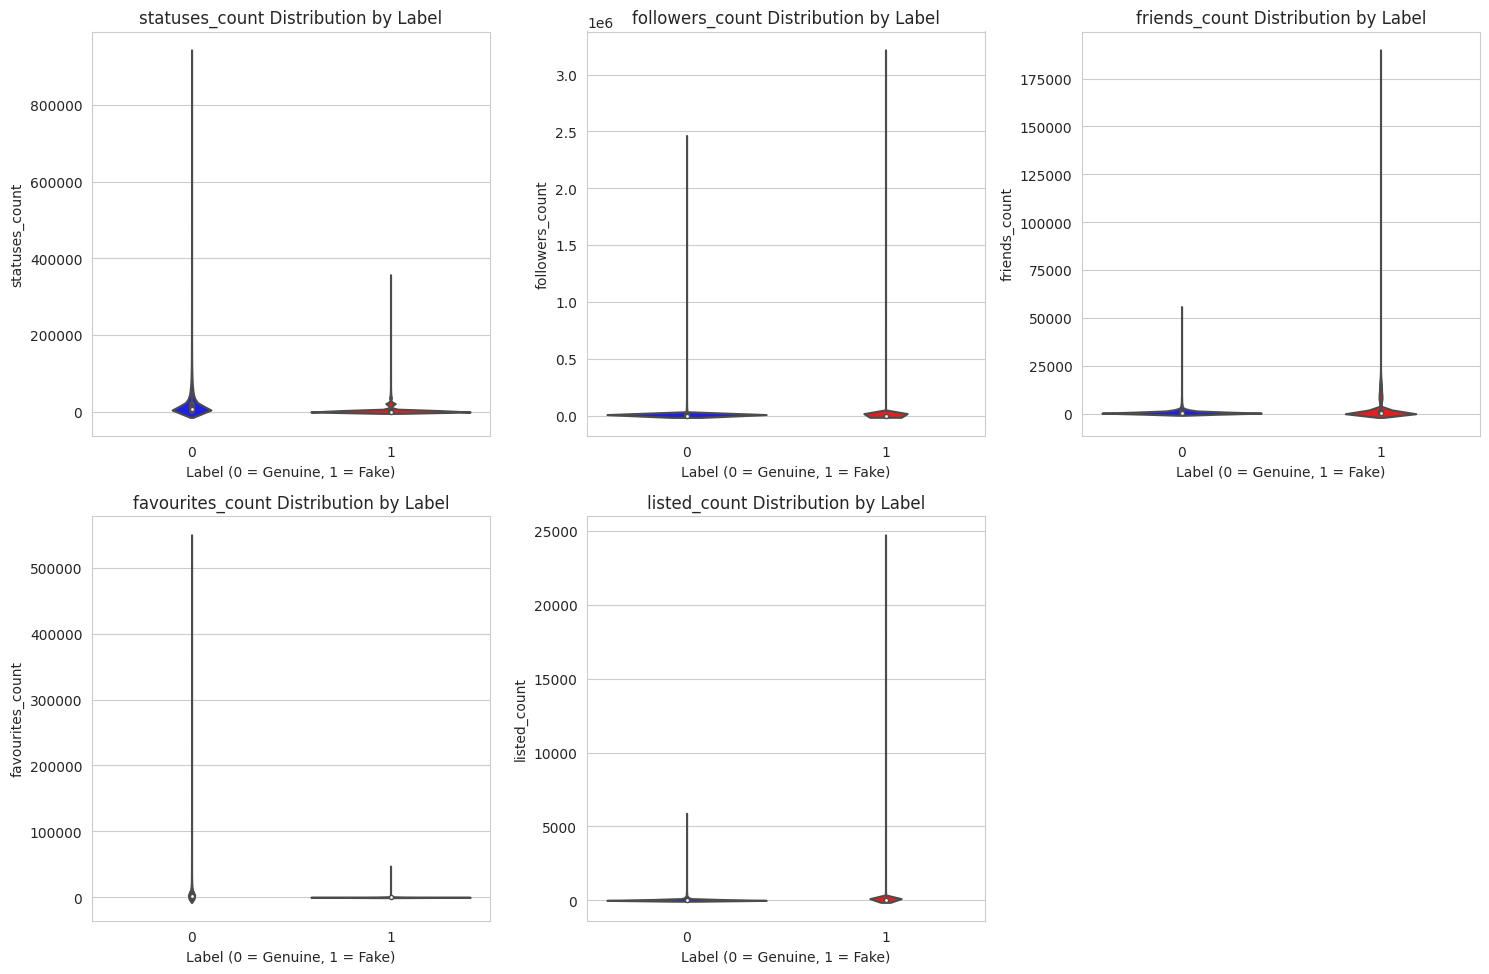

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=merged_df["label"], y=merged_df[col], palette=["blue", "red"])
    plt.title(f"{col} Distribution by Label")
    plt.xlabel("Label (0 = Genuine, 1 = Fake)")

plt.tight_layout()
plt.show()

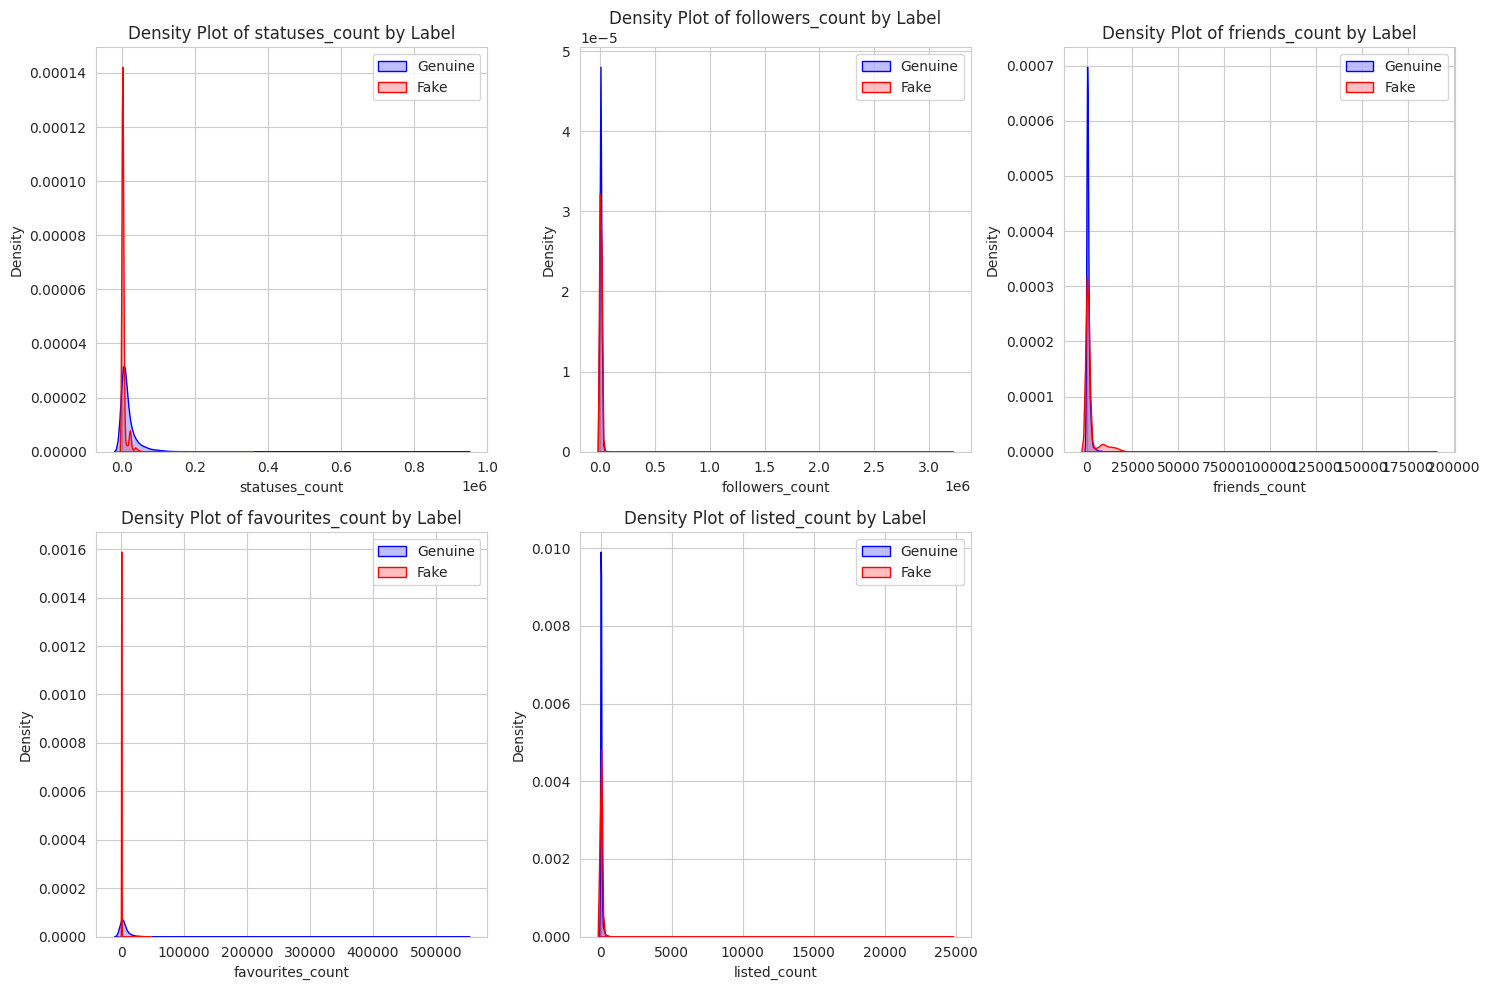

In [76]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(merged_df[merged_df["label"] == 0][col], label="Genuine", shade=True, color="blue")
    sns.kdeplot(merged_df[merged_df["label"] == 1][col], label="Fake", shade=True, color="red")
    plt.title(f"Density Plot of {col} by Label")
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

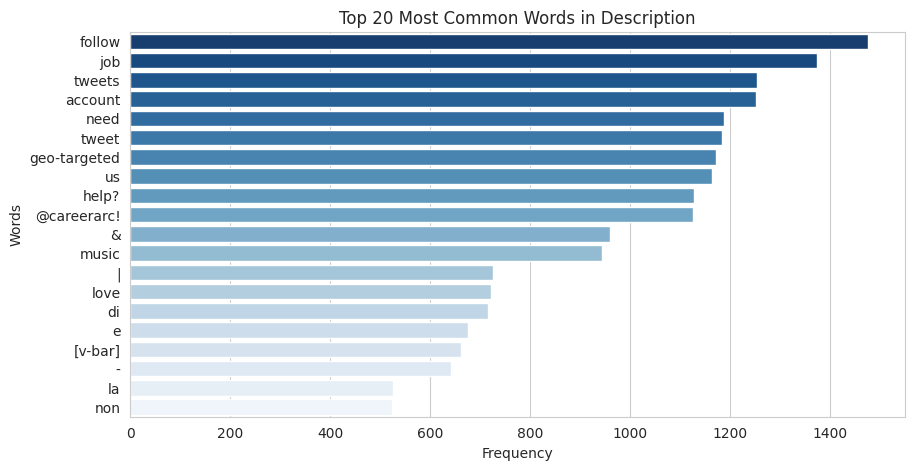

In [77]:
from collections import Counter
from wordcloud import STOPWORDS

# Extract words from descriptions
descriptions = " ".join(merged_df["description"].dropna()).lower().split()
filtered_words = [word for word in descriptions if word not in STOPWORDS]

# Get top 20 most common words
word_counts = Counter(filtered_words).most_common(20)

# Convert to DataFrame for visualization
word_df = pd.DataFrame(word_counts, columns=["Word", "Count"])

# Plot top words
plt.figure(figsize=(10, 5))
sns.barplot(x=word_df["Count"], y=word_df["Word"], palette="Blues_r")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Description")
plt.show()

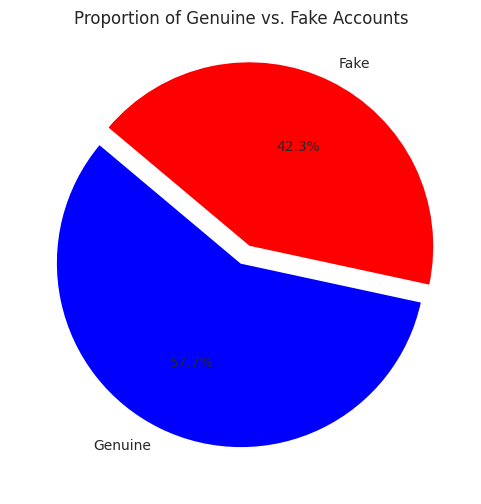

In [82]:
plt.figure(figsize=(6, 6))
colors = ["blue", "red"]
plt.pie(label_counts, labels=["Genuine", "Fake"], autopct="%1.1f%%", colors=colors, startangle=140, explode=[0, 0.1])
plt.title("Proportion of Genuine vs. Fake Accounts")
plt.show()

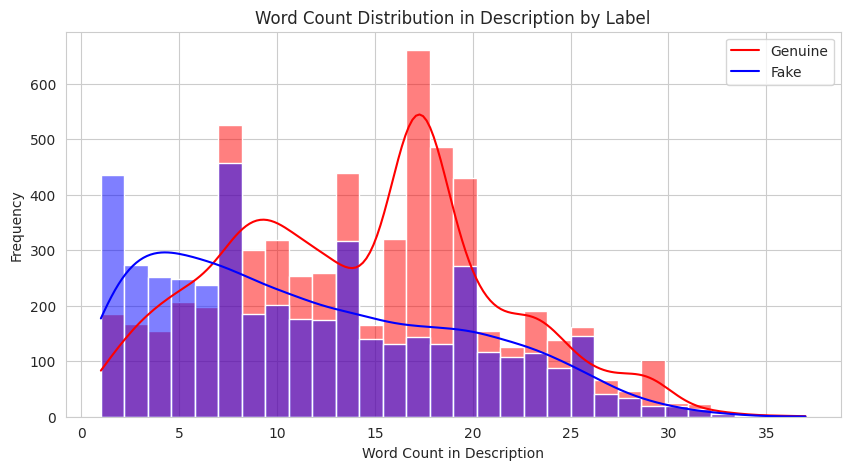

In [ ]:
# Calculate word count
merged_df["word_count"] = merged_df["description"].dropna().apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_df, x="word_count", hue="label", kde=True, bins=30, palette=["blue", "red"])
plt.xlabel("Word Count in Description")
plt.ylabel("Frequency")
plt.title("Word Count Distribution in Description by Label")
plt.legend(["Genuine", "Fake"])
plt.show()
if "word_count" in merged_df.columns:
    merged_df.drop(columns=["word_count"], inplace=True)

# pre-process the Feature Selected dataset columns

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Encode 'geo_enabled' (Convert True/False → 1/0)
merged_df["geo_enabled"] = merged_df["geo_enabled"].map({True: 1, False: 0})

# 2️⃣ Process 'description' (Using TF-IDF)
process_description = True  # Set to False if you want to drop it

if process_description:
    # Convert text to numerical features using TF-IDF
    tfidf = TfidfVectorizer(max_features=500, stop_words=None)  # Increased features from 100 → 500
    description_tfidf = tfidf.fit_transform(merged_df["description"].fillna("")).toarray()
    
    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(description_tfidf, columns=[f"desc_{i}" for i in range(description_tfidf.shape[1])])

    # Merge TF-IDF features into the main DataFrame
    merged_df = pd.concat([merged_df.reset_index(drop=True), tfidf_df], axis=1)

    # Drop the original text column
    merged_df.drop(columns=["description"], inplace=True)

else:
    # Drop 'description' if not processing
    merged_df.drop(columns=["description"], inplace=True)

# 3️⃣ Select Features & Target
X = merged_df.drop(columns=["label"])  # Features
y = merged_df["label"]  # Target variable

# 4️⃣ Split Data into Train & Test Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5️⃣ Feature Scaling (Standardize numerical columns)
scaler = StandardScaler()
num_cols = ["statuses_count", "followers_count", "friends_count", "favourites_count", "listed_count"]

# Apply scaling only on numerical features (avoid SettingWithCopyWarning)
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

# ✅ Preprocessing Done
print("Preprocessing Completed! 🚀")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# 🔹 Check the first few TF-IDF words in the feature set
print("\nSample TF-IDF Words:", tfidf.get_feature_names_out()[:20])  # Show first 20 words

Preprocessing Completed! 🚀
Train Shape: (8481, 506)
Test Shape: (2121, 506)

Sample TF-IDF Words: ['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '50s' '60s'
 '70s' 'about' 'account' 'actor' 'actress' 'ad']


In [30]:
print("Is 'twitter' in vocabulary?", "twitter" in tfidf.get_feature_names_out())
print("Is 'official' in vocabulary?", "official" in tfidf.get_feature_names_out())

Is 'twitter' in vocabulary? True
Is 'official' in vocabulary? True


In [31]:
# Print first 20 TF-IDF words
print("\nSample TF-IDF Words:", tfidf.get_feature_names_out()[:20])

# Check if specific words exist in the TF-IDF feature set
important_words = ["twitter", "official", "account", "bot", "social", "media"]
for word in important_words:
    print(f"Is '{word}' in TF-IDF vocabulary?", word in tfidf.get_feature_names_out())


Sample TF-IDF Words: ['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '50s' '60s'
 '70s' 'about' 'account' 'actor' 'actress' 'ad']
Is 'twitter' in TF-IDF vocabulary? True
Is 'official' in TF-IDF vocabulary? True
Is 'account' in TF-IDF vocabulary? True
Is 'bot' in TF-IDF vocabulary? False
Is 'social' in TF-IDF vocabulary? True
Is 'media' in TF-IDF vocabulary? True


# Train the CNN model

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore")

# ✅ Convert Data to NumPy Arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# ✅ Reshape for CNN (Adding a channel dimension)
X_train_array = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_array = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# ✅ Build the Optimized CNN Model
model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.0005), input_shape=(X_train_array.shape[1], 1)),
    BatchNormalization(),  
    MaxPooling1D(pool_size=2),

    Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])

# ✅ Compile the Model with Optimized Learning Rate
optimizer = Adam(learning_rate=0.0003)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 502, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 502, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 251, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 249, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 249, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 124, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 122, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 122, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 61, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7808)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,999,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,240,129 (8.55 MB)

 Trainable params: 2,239,105 (8.54 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [33]:
# ✅ Early Stopping & Learning Rate Scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ✅ Train the Model
history = model.fit(X_train_array, y_train_array, 
                    epochs=50, batch_size=32, 
                    validation_data=(X_test_array, y_test_array),
                    callbacks=[early_stopping, lr_scheduler])

# ✅ Fine-Tune the Model for 10 More Epochs (if needed)
if early_stopping.stopped_epoch > 0:
    print("\n🔹 Fine-Tuning with Lower Learning Rate (1e-6)")
    optimizer = Adam(learning_rate=1e-6)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history_finetune = model.fit(X_train_array, y_train_array, 
                                 epochs=10, batch_size=32, 
                                 validation_data=(X_test_array, y_test_array))

Epoch 1/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 47s 159ms/step - accuracy: 0.7207 - loss: 1.6423 - val_accuracy: 0.4290 - val_loss: 1.5955 - learning_rate: 3.0000e-04
Epoch 2/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 40s 150ms/step - accuracy: 0.9086 - loss: 1.1556 - val_accuracy: 0.9283 - val_loss: 1.1686 - learning_rate: 3.0000e-04
Epoch 3/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.9365 - loss: 1.0497 - val_accuracy: 0.9264 - val_loss: 0.9978 - learning_rate: 3.0000e-04
Epoch 4/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.9497 - loss: 0.9484 - val_accuracy: 0.9283 - val_loss: 0.9585 - learning_rate: 3.0000e-04
Epoch 5/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - accuracy: 0.9435 - loss: 0.9133 - val_accuracy: 0.9533 - val_loss: 0.8507 - learning_rate: 3.0000e-04
Epoch 6/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 40s 150ms/step - accuracy: 0.9605 - loss: 0.8225 - val_accuracy: 0.9298 - val_loss: 0.9059 - learning_rate: 3.0000e-04
Epoch 7/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 41s 15

## Evaluate the CNN model

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get Predictions for Train & Test Data
y_train_pred_probs = model.predict(X_train_array)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)  # Convert probabilities to 0 or 1

y_test_pred_probs = model.predict(X_test_array)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# 🔹 PRINT CLASSIFICATION REPORTS
print("🔹 TRAIN DATASET PERFORMANCE 🔹")
print(classification_report(y_train_array, y_train_pred, target_names=["Genuine", "Fake"]))

print("\n🔹 TEST DATASET PERFORMANCE 🔹")
print(classification_report(y_test_array, y_test_pred, target_names=["Genuine", "Fake"]))

266/266 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
🔹 TRAIN DATASET PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.99      1.00      0.99      3585
        Fake       1.00      0.99      0.99      4896

    accuracy                           0.99      8481
   macro avg       0.99      0.99      0.99      8481
weighted avg       0.99      0.99      0.99      8481


🔹 TEST DATASET PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.96      0.96      0.96       897
        Fake       0.97      0.97      0.97      1224

    accuracy                           0.97      2121
   macro avg       0.97      0.97      0.97      2121
weighted avg       0.97      0.97      0.97      2121



## confusion matrix(CNN-model)

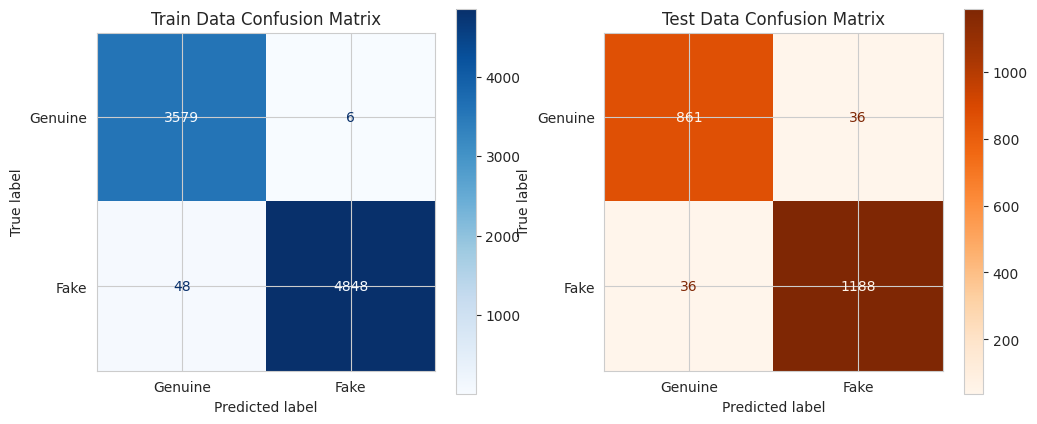

In [36]:
# 🔹 PLOT CONFUSION MATRIX
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Confusion Matrix
cm_train = confusion_matrix(y_train_array, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Genuine", "Fake"])
disp_train.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Train Data Confusion Matrix")

# Test Confusion Matrix
cm_test = confusion_matrix(y_test_array, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Genuine", "Fake"])
disp_test.plot(ax=axes[1], cmap="Oranges", values_format="d")
axes[1].set_title("Test Data Confusion Matrix")

plt.show()

## accuracy and validation loss(CNN-model)

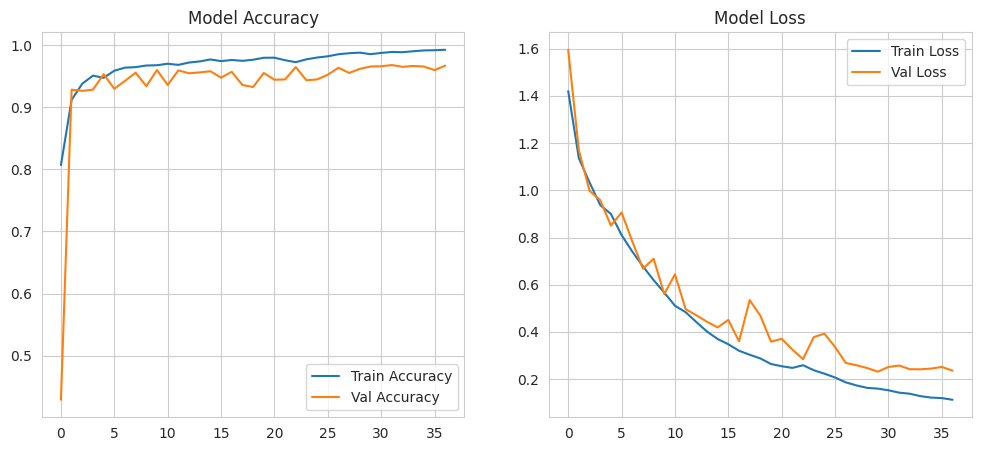

In [37]:
# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

## Save the CNN model

In [38]:
model.save("fake_account_cnn_model.h5")
print("\nModel Saved Successfully! 🚀")


Model Saved Successfully! 🚀


# Train the LSTM model

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# ✅ Convert DataFrames to NumPy Arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# ✅ Reshape Data for LSTM (Adding 'timesteps' dimension)
X_train_array = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_test_array = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# ✅ Build the Optimized LSTM Model
model = Sequential([
    Bidirectional(LSTM(512, return_sequences=True, activation='relu', kernel_regularizer=l2(0.0005)), input_shape=(1, X_train_array.shape[2])),
    BatchNormalization(),
    Dropout(0.5),

    Bidirectional(LSTM(256, return_sequences=True, activation='relu', kernel_regularizer=l2(0.0005))),
    BatchNormalization(),
    Dropout(0.5),

    Bidirectional(LSTM(128, return_sequences=True, activation='relu', kernel_regularizer=l2(0.0005))),
    BatchNormalization(),
    Dropout(0.5),

    Bidirectional(LSTM(64, return_sequences=False, activation='relu', kernel_regularizer=l2(0.0005))),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification (0 = Genuine, 1 = Fake)
])

# ✅ Compile the Model with Optimized Learning Rate
optimizer = Adam(learning_rate=0.0003, clipnorm=1.0)  # Clip gradients to prevent explosion
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 1024)             │       4,173,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 1024)             │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 512)              │       2,623,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 1, 256)              │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,699,969 (29.37 MB)

 Trainable params: 7,696,129 (29.36 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [40]:
# ✅ Early Stopping & Learning Rate Scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# ✅ Train the Model for 60 Epochs
history = model.fit(X_train_array, y_train_array, 
                    epochs=60, batch_size=16, 
                    validation_data=(X_test_array, y_test_array),
                    callbacks=[early_stopping, lr_scheduler])

# ✅ Fine-Tune the Model for 10 More Epochs (if needed)
if early_stopping.stopped_epoch > 0:
    print("\n🔹 Fine-Tuning with Lower Learning Rate (1e-5)")
    optimizer = Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history_finetune = model.fit(X_train_array, y_train_array, 
                                 epochs=10, batch_size=16, 
                                 validation_data=(X_test_array, y_test_array))

Epoch 1/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 62s 86ms/step - accuracy: 0.5580 - loss: 3.0614 - val_accuracy: 0.8892 - val_loss: 2.3215 - learning_rate: 3.0000e-04
Epoch 2/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.8543 - loss: 2.0267 - val_accuracy: 0.9477 - val_loss: 1.6968 - learning_rate: 3.0000e-04
Epoch 3/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - accuracy: 0.9174 - loss: 1.6375 - val_accuracy: 0.9444 - val_loss: 1.4037 - learning_rate: 3.0000e-04
Epoch 4/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - accuracy: 0.9313 - loss: 1.3804 - val_accuracy: 0.9444 - val_loss: 1.2129 - learning_rate: 3.0000e-04
Epoch 5/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.9379 - loss: 1.1605 - val_accuracy: 0.9496 - val_loss: 1.0455 - learning_rate: 3.0000e-04
Epoch 6/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.9424 - loss: 1.0266 - val_accuracy: 0.9486 - val_loss: 0.9137 - learning_rate: 3.0000e-04
Epoch 7/60
531/531 ━━━━━━━━━━━━━━━━━━━━ 44s 82ms/ste

## Evaluate the LSTM model

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make Predictions
y_train_pred_probs = model.predict(X_train_array)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

y_test_pred_probs = model.predict(X_test_array)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Print Classification Reports
print("🔹 TRAIN DATASET PERFORMANCE 🔹")
print(classification_report(y_train_array, y_train_pred, target_names=["Genuine", "Fake"]))

print("\n🔹 TEST DATASET PERFORMANCE 🔹")
print(classification_report(y_test_array, y_test_pred, target_names=["Genuine", "Fake"]))

266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
🔹 TRAIN DATASET PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.99      1.00      0.99      3585
        Fake       1.00      0.99      0.99      4896

    accuracy                           0.99      8481
   macro avg       0.99      0.99      0.99      8481
weighted avg       0.99      0.99      0.99      8481


🔹 TEST DATASET PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.93      0.96      0.94       897
        Fake       0.97      0.95      0.96      1224

    accuracy                           0.95      2121
   macro avg       0.95      0.95      0.95      2121
weighted avg       0.95      0.95      0.95      2121



## confusion matrix(LSTM-model)

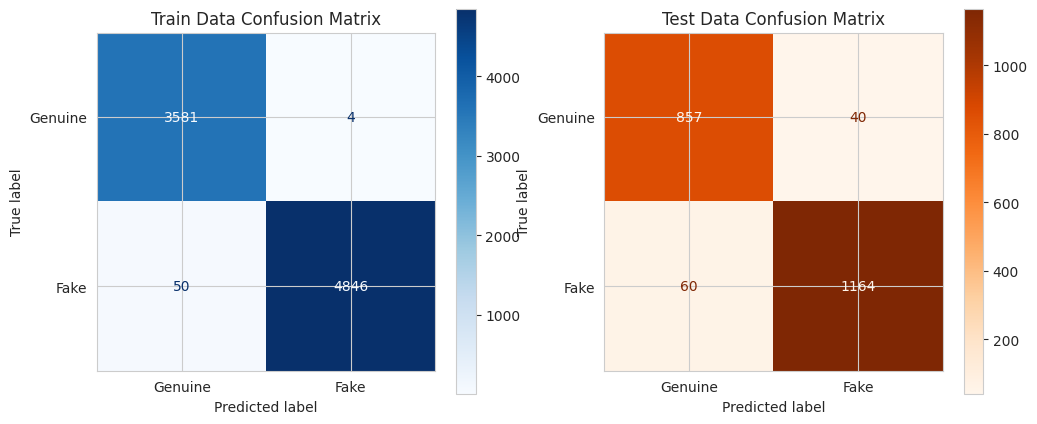

In [42]:
# ✅ Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Confusion Matrix
cm_train = confusion_matrix(y_train_array, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Genuine", "Fake"])
disp_train.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Train Data Confusion Matrix")

# Test Confusion Matrix
cm_test = confusion_matrix(y_test_array, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Genuine", "Fake"])
disp_test.plot(ax=axes[1], cmap="Oranges", values_format="d")
axes[1].set_title("Test Data Confusion Matrix")

plt.show()

## accuracy and validation loss(LSTM-model)

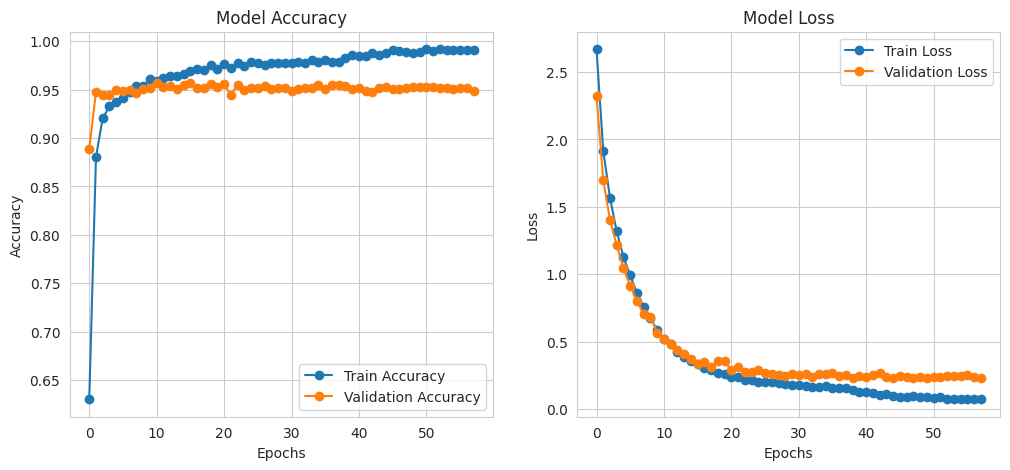

In [43]:
import matplotlib.pyplot as plt

# ✅ Create a figure with two subplots (Accuracy & Loss)
plt.figure(figsize=(12, 5))

# ✅ Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# ✅ Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

# ✅ Show the plots
plt.show()

## Save the LSTM model

In [44]:
# Save the Model
model.save("fake_account_lstm_model.h5")
print("\nLSTM Model Saved Successfully! 🚀")


LSTM Model Saved Successfully! 🚀


# Train the ANN model

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore")

# ✅ Convert Data to NumPy Arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# ✅ Build the Improved ANN Model
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_array.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary Classification
])

# ✅ Compile the Model
optimizer = Adam(learning_rate=0.0003)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │         129,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,977 (683.50 KB)

 Trainable params: 174,017 (679.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [46]:

# ✅ Callbacks: Early Stopping, Reduce LR, and Learning Rate Scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ✅ Train the Model
history = model.fit(X_train_array, y_train_array, 
                    epochs=100, batch_size=64,  # Increase batch size for stable updates
                    validation_data=(X_test_array, y_test_array),
                    callbacks=[early_stopping, lr_scheduler])

# ✅ Fine-Tune with Lower Learning Rate if Needed
if early_stopping.stopped_epoch > 0:
    print("\n🔹 Fine-Tuning with Lower Learning Rate (1e-6)")
    optimizer = Adam(learning_rate=1e-6)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history_finetune = model.fit(X_train_array, y_train_array, 
                                 epochs=10, batch_size=64, 
                                 validation_data=(X_test_array, y_test_array))

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5442 - loss: 1.6075 - val_accuracy: 0.4234 - val_loss: 1.2811 - learning_rate: 3.0000e-04
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7049 - loss: 1.2145 - val_accuracy: 0.6167 - val_loss: 1.1553 - learning_rate: 3.0000e-04
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8069 - loss: 1.0187 - val_accuracy: 0.8986 - val_loss: 0.9552 - learning_rate: 3.0000e-04
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8412 - loss: 0.9447 - val_accuracy: 0.9250 - val_loss: 0.8128 - learning_rate: 3.0000e-04
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8772 - loss: 0.8589 - val_accuracy: 0.9392 - val_loss: 0.7443 - learning_rate: 3.0000e-04
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8944 - loss: 0.8274 - val_accuracy: 0.9382 - val_loss: 0.7042 - learning_rate: 3.0000e-04
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

## Evaluate the ANN model

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Make Predictions
y_train_pred_probs = model.predict(X_train_array)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

y_test_pred_probs = model.predict(X_test_array)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# ✅ Print Classification Reports
print("🔹 TRAIN DATASET PERFORMANCE 🔹")
print(classification_report(y_train_array, y_train_pred, target_names=["Genuine", "Fake"]))

print("\n🔹 TEST DATASET PERFORMANCE 🔹")
print(classification_report(y_test_array, y_test_pred, target_names=["Genuine", "Fake"]))

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 TRAIN DATASET PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.98      1.00      0.99      3585
        Fake       1.00      0.99      0.99      4896

    accuracy                           0.99      8481
   macro avg       0.99      0.99      0.99      8481
weighted avg       0.99      0.99      0.99      8481


🔹 TEST DATASET PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.94      0.94      0.94       897
        Fake       0.95      0.95      0.95      1224

    accuracy                           0.95      2121
   macro avg       0.95      0.95      0.95      2121
weighted avg       0.95      0.95      0.95      2121



## Confusion matrix(ANN-model)

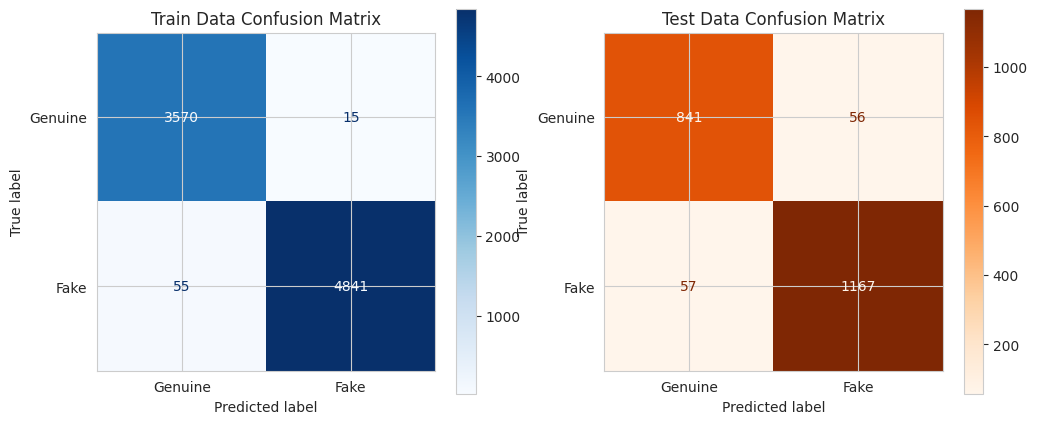

In [48]:
# ✅ Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Confusion Matrix
cm_train = confusion_matrix(y_train_array, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Genuine", "Fake"])
disp_train.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Train Data Confusion Matrix")

# Test Confusion Matrix
cm_test = confusion_matrix(y_test_array, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Genuine", "Fake"])
disp_test.plot(ax=axes[1], cmap="Oranges", values_format="d")
axes[1].set_title("Test Data Confusion Matrix")

plt.show()

## accuracy and validation loss(ANN-model)

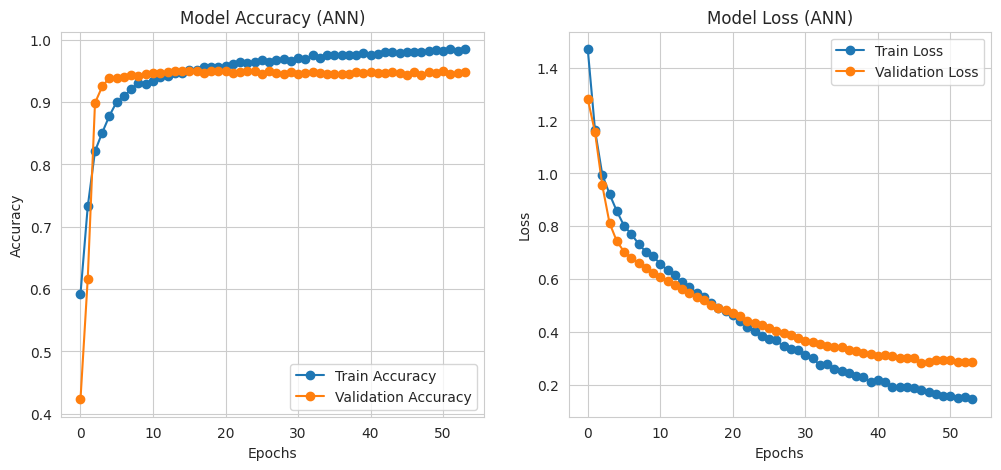

In [49]:
# ✅ Create a figure with two subplots (Accuracy & Loss)
plt.figure(figsize=(12, 5))

# ✅ Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy (ANN)')
plt.legend()
plt.grid(True)

# ✅ Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss (ANN)')
plt.legend()
plt.grid(True)

# ✅ Show the plots
plt.show()

## Save the ANN model

In [50]:
# Save the Model
model.save("fake_account_ann_model.h5")
print("\nANN Model Saved Successfully! 🚀")


ANN Model Saved Successfully! 🚀


# Load the all trained models

In [51]:
from tensorflow.keras.models import load_model

# Load previously saved models
cnn_model = load_model("fake_account_cnn_model.h5")
lstm_model = load_model("fake_account_lstm_model.h5")
ann_model = load_model("fake_account_ann_model.h5")

print("Models loaded successfully! ✅")

Models loaded successfully! ✅


# metrics on testing dataset

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Store Metrics for Each Model
metrics_dict = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# ✅ Dictionary of Models
models = {"CNN": cnn_model, "LSTM": lstm_model, "ANN": ann_model}

for name, model in models.items():
    # ✅ Ensure Correct Input Shape for Each Model
    if name == "LSTM":
        # LSTM Requires 3D Input: (samples, timesteps, features)
        X_test_input = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])
    else:
        # CNN & ANN Use 2D Input: (samples, features)
        X_test_input = X_test_array

    # ✅ Make Predictions
    y_test_pred_probs = model.predict(X_test_input)
    y_test_pred = (y_test_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

    # ✅ Compute Metrics
    metrics_dict["Model"].append(name)
    metrics_dict["Accuracy"].append(accuracy_score(y_test_array, y_test_pred))
    metrics_dict["Precision"].append(precision_score(y_test_array, y_test_pred))
    metrics_dict["Recall"].append(recall_score(y_test_array, y_test_pred))
    metrics_dict["F1-Score"].append(f1_score(y_test_array, y_test_pred))

    # ✅ Print Classification Report
    print(f"\n🔹 {name} MODEL PERFORMANCE 🔹")
    print(classification_report(y_test_array, y_test_pred, target_names=["Genuine", "Fake"]))

67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step

🔹 CNN MODEL PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.96      0.96      0.96       897
        Fake       0.97      0.97      0.97      1224

    accuracy                           0.97      2121
   macro avg       0.97      0.97      0.97      2121
weighted avg       0.97      0.97      0.97      2121

67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step

🔹 LSTM MODEL PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.93      0.96      0.94       897
        Fake       0.97      0.95      0.96      1224

    accuracy                           0.95      2121
   macro avg       0.95      0.95      0.95      2121
weighted avg       0.95      0.95      0.95      2121

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

🔹 ANN MODEL PERFORMANCE 🔹
              precision    recall  f1-score   support

     Genuine       0.94      0.94      0.94       897
        Fake       0.95      0.95   

# Test Model Performance Comparison

In [53]:
# ✅ Convert to DataFrame for Better Visualization
metrics_df = pd.DataFrame(metrics_dict)
print("\n🔹 Test Model Performance Comparison 🔹")
print(metrics_df)


🔹 Test Model Performance Comparison 🔹
  Model  Accuracy  Precision    Recall  F1-Score
0   CNN  0.966054   0.970588  0.970588  0.970588
1  LSTM  0.952852   0.966777  0.950980  0.958814
2   ANN  0.946723   0.954211  0.953431  0.953821


## plot Performance Comparison

<Figure size 1000x600 with 0 Axes>

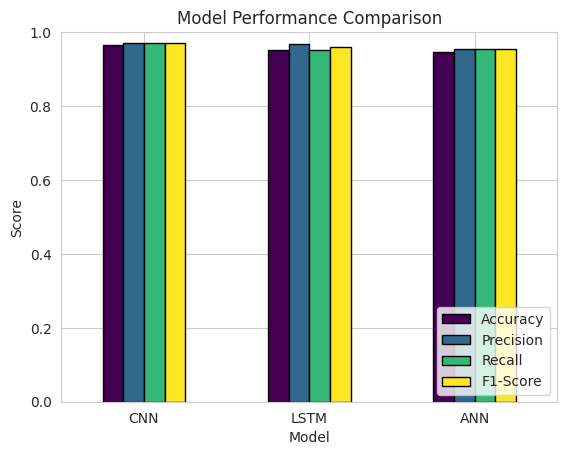

In [54]:
# ✅ Plot Performance Comparison
plt.figure(figsize=(10, 6))
metrics_df.set_index("Model").plot(kind="bar", colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# Train Model Performance Comparison

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Store Metrics for Train Data
metrics_dict = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# ✅ Dictionary of Models
models = {"CNN": cnn_model, "LSTM": lstm_model, "ANN": ann_model}

for name, model in models.items():
    # ✅ Ensure Correct Input Shape for Each Model
    if name == "LSTM":
        # LSTM Requires 3D Input: (samples, timesteps, features)
        X_train_input = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
    else:
        # CNN & ANN Use 2D Input: (samples, features)
        X_train_input = X_train_array

    # ✅ Make Predictions
    y_train_pred_probs = model.predict(X_train_input)
    y_train_pred = (y_train_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

    # ✅ Compute Metrics
    metrics_dict["Model"].append(name)
    metrics_dict["Accuracy"].append(accuracy_score(y_train_array, y_train_pred))
    metrics_dict["Precision"].append(precision_score(y_train_array, y_train_pred))
    metrics_dict["Recall"].append(recall_score(y_train_array, y_train_pred))
    metrics_dict["F1-Score"].append(f1_score(y_train_array, y_train_pred))

    # ✅ Print Classification Report
    print(f"\n🔹 {name} MODEL PERFORMANCE on Train DATA 🔹")
    print(classification_report(y_train_array, y_train_pred, target_names=["Genuine", "Fake"]))

266/266 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step

🔹 CNN MODEL PERFORMANCE on Train DATA 🔹
              precision    recall  f1-score   support

     Genuine       0.99      1.00      0.99      3585
        Fake       1.00      0.99      0.99      4896

    accuracy                           0.99      8481
   macro avg       0.99      0.99      0.99      8481
weighted avg       0.99      0.99      0.99      8481

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step

🔹 LSTM MODEL PERFORMANCE on Train DATA 🔹
              precision    recall  f1-score   support

     Genuine       0.99      1.00      0.99      3585
        Fake       1.00      0.99      0.99      4896

    accuracy                           0.99      8481
   macro avg       0.99      0.99      0.99      8481
weighted avg       0.99      0.99      0.99      8481

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔹 ANN MODEL PERFORMANCE on Train DATA 🔹
              precision    recall  f1-score   support

     Genuine       0.98      1.00      0.9

In [56]:
# ✅ Convert to DataFrame for Better Visualization
metrics_df = pd.DataFrame(metrics_dict)
print("\n🔹 Train Model Performance Comparison 🔹")
print(metrics_df)


🔹 Train Model Performance Comparison 🔹
  Model  Accuracy  Precision    Recall  F1-Score
0   CNN  0.993633   0.998764  0.990196  0.994462
1  LSTM  0.993633   0.999175  0.989788  0.994459
2   ANN  0.991746   0.996911  0.988766  0.992822


## Plot performance Comparison

<Figure size 1000x600 with 0 Axes>

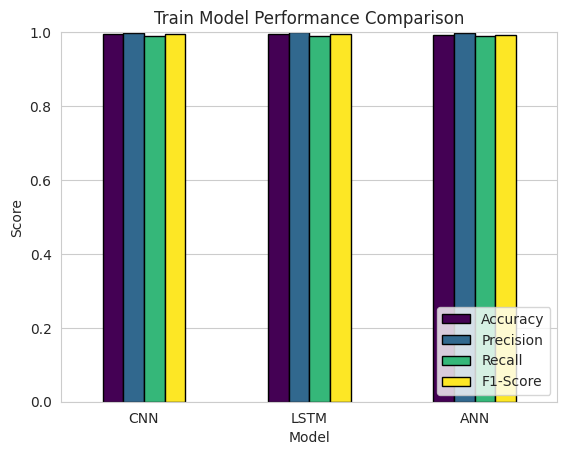

In [57]:
# ✅ Plot Performance Comparison
plt.figure(figsize=(10, 6))
metrics_df.set_index("Model").plot(kind="bar", colormap="viridis", edgecolor="black")
plt.title("Train Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# Function to test on Unseen data for feature selected columns

In [58]:
import numpy as np

# ✅ Function to Preprocess New Input Data
def preprocess_input(new_data, tfidf, scaler):
    """
    Preprocess a single input data instance.
    - new_data: Dictionary containing input values (like a row in a DataFrame)
    - tfidf: Trained TF-IDF vectorizer
    - scaler: Trained StandardScaler for numerical features
    """

    # 1️⃣ Extract Features from Input
    numerical_features = np.array([
        new_data["statuses_count"],
        new_data["followers_count"],
        new_data["friends_count"],
        new_data["favourites_count"],
        new_data["listed_count"]
    ]).reshape(1, -1)  # Reshape for scaling

    categorical_features = np.array([new_data["geo_enabled"]]).reshape(1, -1)  # Reshape

    # 2️⃣ Process Description using Trained TF-IDF Vectorizer
    description_features = tfidf.transform([new_data["description"]]).toarray()

    # 3️⃣ Scale Numerical Features
    numerical_features = scaler.transform(numerical_features)

    # 4️⃣ Combine All Features
    processed_input = np.hstack([numerical_features, categorical_features, description_features])

    return processed_input

# ✅ Function to Make Predictions with Pure Majority Voting
def predict_with_majority_voting(new_data):
    """
    Predicts whether an account is Genuine or Fake using CNN, LSTM, and ANN with majority voting.
    - new_data: Dictionary with input values (same format as training data)
    """

    # Preprocess the new data
    processed_input = preprocess_input(new_data, tfidf, scaler)

    # ✅ Reshape for LSTM (LSTM requires 3D input: (samples, timesteps, features))
    lstm_input = processed_input.reshape(1, 1, processed_input.shape[1])

    # ✅ Make Predictions
    cnn_pred = int(cnn_model.predict(processed_input) > 0.5)  # Convert to binary (0 = Genuine, 1 = Fake)
    lstm_pred = int(lstm_model.predict(lstm_input) > 0.5)
    ann_pred = int(ann_model.predict(processed_input) > 0.5)

    # ✅ Majority Voting
    votes = [cnn_pred, lstm_pred, ann_pred]  # List of predictions (0s and 1s)
    final_prediction = 1 if votes.count(1) > votes.count(0) else 0  # Majority vote

    # ✅ Print Results
    print("\n🔹 **Predictions on Unseen Data** 🔹")
    print(f"🔵 CNN Model Prediction: {'Fake' if cnn_pred else 'Genuine'}")
    print(f"🟢 LSTM Model Prediction: {'Fake' if lstm_pred else 'Genuine'}")
    print(f"🔴 ANN Model Prediction: {'Fake' if ann_pred else 'Genuine'}")

    # ✅ Display Final Majority Vote Prediction
    final_label = "Fake" if final_prediction == 1 else "Genuine"
    print(f"\n🔹 **Final Decision (Majority Voting): {final_label}**")

# Give manual inputs for predicting fake or genuine

In [59]:
# ✅ Example Input (Unseen Data)
new_input = {
    "statuses_count": 1245,
    "followers_count": 3418,
    "friends_count": 45,
    "favourites_count": 13,
    "listed_count": 53,
    "geo_enabled": 1,  # 1 for True, 0 for False
    "description": "My purpose is to awaken people to life changing knowledge for personal freedom"
}

# ✅ Run Prediction
predict_with_majority_voting(new_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

🔹 **Predictions on Unseen Data** 🔹
🔵 CNN Model Prediction: Fake
🟢 LSTM Model Prediction: Fake
🔴 ANN Model Prediction: Fake

🔹 **Final Decision (Majority Voting): Fake**


# THANK YOU